In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'
import numpy as np
# Import custom code
from erpsc.count_hack import Count
from erpsc.core.io import save_pickle_obj, load_pickle_obj
import csv
import re

ImportError: No module named erpsc.count_hack

###### first, scrape all the concept terms from cognitive atlas

In [2]:
# scraping the cognitive atlas webpage for terms
from bs4 import BeautifulSoup
import urllib
CAurl = urllib.urlopen('http://www.cognitiveatlas.org/concepts/').read()
soup = BeautifulSoup(CAurl, 'html.parser')
#print(soup.prettify())
concepts = soup.find_all('span', attrs={'class': 'concept'})
terms = []
for c in concepts:
    terms.append(str(c.text.strip()))


### cognitive terms
###### using the scraped terms, go on pubmed to search for all articles with each keyword PLUS (cognitive OR cognition)

In [5]:
# scraping term count
base_phrase = 'AND("cognitive"OR"cognition")'
# Initialize object for term count co-occurences. 
counts = Count()
# load terms from scraped CA list and search in pubmed database
counts.set_terms(terms)
counts.scrape_term(db='pubmed', base_phrase=base_phrase)

(['abductive reasoning'], 3)
(['abstract analogy'], 0)
(['abstract knowledge'], 43)
(['acoustic coding'], 3)
(['acoustic encoding'], 0)
(['acoustic phonetic processing'], 1)
(['acoustic processing'], 19)
(['action'], 15045)
(['action initiation'], 21)
(['action perception'], 186)
(['activation'], 20249)
(['activation level'], 62)
(['active maintenance'], 85)
(['active recall'], 6)
(['active retrieval'], 15)
(['acuity'], 1405)
(['adaptation'], 13497)
(['adaptive control'], 107)
(['addiction'], 4125)
(['affect perception'], 68)
(['affect recognition'], 189)
(['agency'], 1483)
(['agreeableness'], 211)
(['altruism'], 313)
(['altruistic motivation'], 3)
(['alveolar'], 89)
(['amodal representation'], 7)
(['analog representation'], 3)
(['analogical encoding'], 1)
(['analogical inference'], 4)
(['analogical problem solving'], 6)
(['analogical reasoning'], 126)
(['analogical transfer'], 13)
(['analogy'], 365)
(['anchoring'], 194)
(['anhedonia'], 609)
(['animacy decision'], 2)
(['animacy percept

###### save scraped term-count table to file

In [6]:
terms_count = counts.term_counts
# save term frequency to file
with open('term_count_cog.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for ind, t in enumerate(terms_count[:]):
        spamwriter.writerow([terms[ind]] + [int(t)])

### neuro terms
###### using the scraped terms, go on pubmed to search for all articles with each keyword PLUS neuroimaging terms

In [13]:
# scraping term count
base_phrase = ('AND('+
                '("fmri"OR"neuroimaging")OR'+
                '("eeg"OR"electroencephalography")OR'+
                '("meg"OR"magnetoencephalography")OR'+
                '("ecog"OR"electrocorticography")OR'+
                '("lfp"OR"local field potential")OR'+
                '("single unit"OR"single-unit"OR"single neuron")OR'+
                '("calcium imaging")'
                ')')
print base_phrase

AND(("fmri"OR"neuroimaging")OR("eeg"OR"electroencephalography")OR("meg"OR"magnetoencephalography")OR("ecog"OR"electrocorticography")OR("lfp"OR"local field potential")OR("single unit"OR"single-unit"OR"single neuron")OR("calcium imaging"))


In [14]:
# Initialize object for term count co-occurences. 
counts = Count()
# load terms from scraped CA list and search in pubmed database
counts.set_terms(terms)
counts.scrape_term(db='pubmed', base_phrase=base_phrase)

(['abductive reasoning'], 0)
(['abstract analogy'], 0)
(['abstract knowledge'], 5)
(['acoustic coding'], 1)
(['acoustic encoding'], 0)
(['acoustic phonetic processing'], 6)
(['acoustic processing'], 25)
(['action'], 13673)
(['action initiation'], 6)
(['action perception'], 99)
(['activation'], 27284)
(['activation level'], 78)
(['active maintenance'], 67)
(['active recall'], 3)
(['active retrieval'], 6)
(['acuity'], 767)
(['adaptation'], 3519)
(['adaptive control'], 54)
(['addiction'], 1544)
(['affect perception'], 16)
(['affect recognition'], 62)
(['agency'], 487)
(['agreeableness'], 29)
(['altruism'], 49)
(['altruistic motivation'], 4)
(['alveolar'], 348)
(['amodal representation'], 4)
(['analog representation'], 0)
(['analogical encoding'], 0)
(['analogical inference'], 0)
(['analogical problem solving'], 0)
(['analogical reasoning'], 19)
(['analogical transfer'], 0)
(['analogy'], 124)
(['anchoring'], 31)
(['anhedonia'], 190)
(['animacy decision'], 3)
(['animacy perception'], 5)
(['

###### save scraped term-count table to file

In [15]:
terms_count = counts.term_counts
# save term frequency to file
with open('term_count_neuro.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    for ind, t in enumerate(terms_count[:]):
        spamwriter.writerow([terms[ind]] + [int(t)])

###### load in terms and count, and filter for words with 100+ occurrences

138


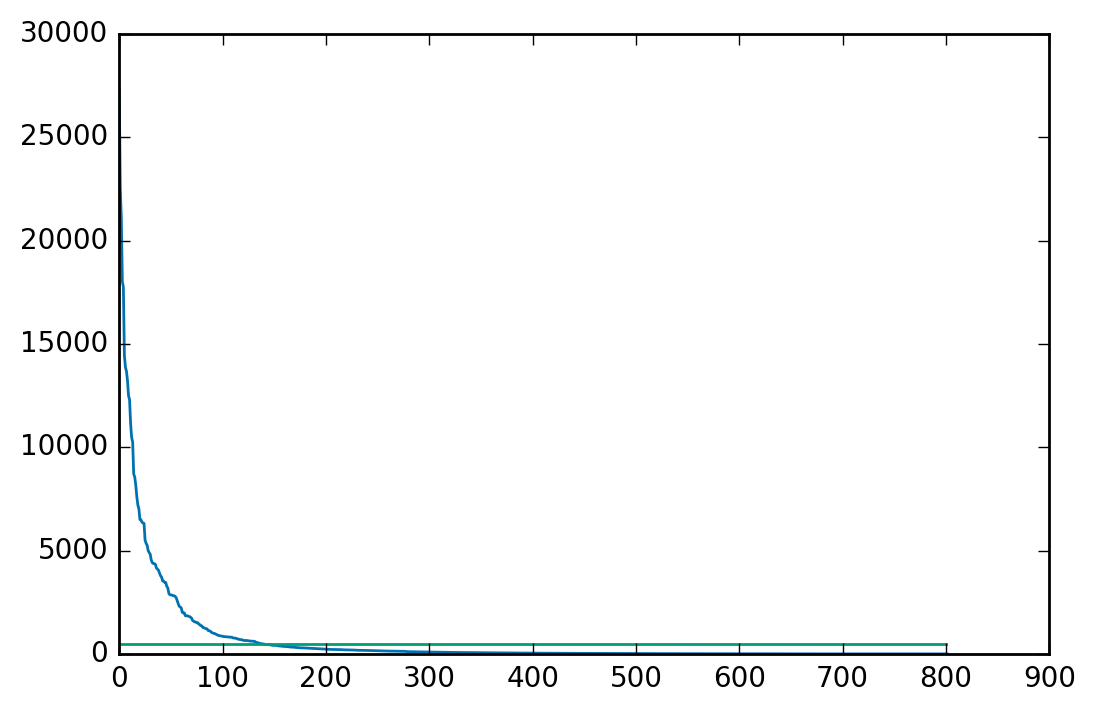

In [47]:
# load in terms and count
terms_file = 'term_count_neuro.csv'
terms = []
terms_count = []
with open(terms_file, 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        terms.append(row[0])
        terms_count.append(int(row[1]))

terms_count = np.asarray(terms_count)
count_thresh = 500.
print len(np.where(terms_count>=count_thresh)[0])
t_sorted = np.sort(terms_count)
plt.plot(t_sorted[::-1])
plt.plot([1.,800.],[count_thresh]*2)

# threshold by counts
terms_thr = [terms[idx] for idx in np.where(terms_count>=count_thresh)[0]]